In [1]:
import tensorflow as tf

In [2]:
tf

<module 'tensorflow' from '/opt/homebrew/lib/python3.10/site-packages/tensorflow/__init__.py'>

### Basic operations

In [3]:
x = tf.constant([[1, 2, 3], [4, 5, 6]])

x

x.shape

x + x

x = tf.cast(x, tf.double)

tf.nn.softmax(x, axis=0)

tf.reduce_sum(x[0])

<tf.Tensor: shape=(), dtype=float64, numpy=6.0>

### Math functions

In [17]:
xv = tf.Variable(x)

# 求微分

def f(x):
    y = tf.pow(x, 2) + tf.multiply(2, x)
    return y

with tf.GradientTape(persistent=True) as tape:
    tape.watch(xv)
    y = f(xv)

In [20]:
y

<tf.Tensor: shape=(2, 3), dtype=float64, numpy=
array([[ 3.,  8., 15.],
       [24., 35., 48.]])>

In [21]:
tape.gradient(y, xv)

<tf.Tensor: shape=(2, 3), dtype=float64, numpy=
array([[ 4.,  6.,  8.],
       [10., 12., 14.]])>

### Build a training model

> Configure the model

In [56]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [5, 4]

In [57]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

In [58]:
def f(x):
    y = tf.pow(x, 2) + tf.multiply(x, 2) - 5
    return y
y = f(x) + tf.random.normal(shape=[201])

In [112]:
class MyModel(tf.Module):
    def __init__(self):
        rand_init = tf.random.uniform(shape=[3], minval=-10, maxval=10, seed=22)
        # Set the init.
        self.w_g = tf.Variable(rand_init[0])
        self.w_l = tf.Variable(rand_init[1])
        self.b = tf.Variable(rand_init[2])
    
    @tf.function
    def __call__(self, x):
        # Quadratic Model.
        return tf.multiply(self.w_g, tf.pow(x, 2)) + tf.multiply(self.w_l, x) + self.b

model = MyModel()

In [113]:
def plot_preds(x, y, f, model, title):
    plt.plot(x.numpy(), y.numpy(), '.', linewidth=0.1, label="Data")
    plt.plot(x, f(x), label="Actual Line", color='r')
    plt.plot(x, model(x), label="Prediction Line", color='g')
    plt.legend()

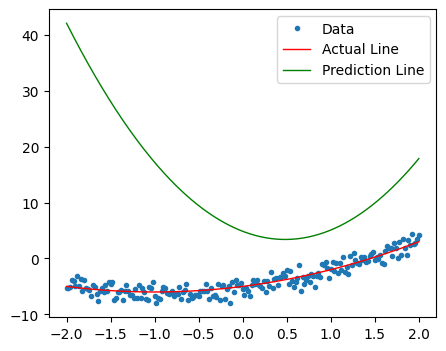

In [114]:
plot_preds(x, y, f, model, "Before Training")

> Training the model

In [106]:
model.variables

()

In [107]:
model.variables

()

In [108]:
model